# Análise descritiva
É o tipo de análise mais antiga e comumente utilizada na área de Business Intelligence. Nos permite aprender sobre os eventos passados.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/carros.csv')

In [3]:
df.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,150.0,2008.726667,2.200966,2000.0,2008.00,2009.0,2010.0,2012.0
price,150.0,12961.933333,3122.481735,3800.0,10995.00,13591.5,14904.5,21992.0
mileage,150.0,44260.646667,26982.104322,4867.0,27200.25,36385.0,55124.5,151479.0


### Média e mediana da variável

In [7]:
np.mean(df['price'])

12961.933333333332

In [8]:
np.median(df['price'])

13591.5

### Range de valores

In [11]:
df['price'].min(), df['price'].max()

(3800, 21992)

In [12]:
#Diferença
df['price'].max() - df['price'].min()

18192

### Quartiles

In [14]:
#calculate interquartile range 
q3, q1 = np.percentile(df['price'], [75 ,25])
iqr = q3 - q1
print(iqr)

3909.5


In [17]:
np.percentile(df['price'], [0, 25, 50, 75, 100])

array([ 3800. , 10995. , 13591.5, 14904.5, 21992. ])

### Gráficos estatísticos

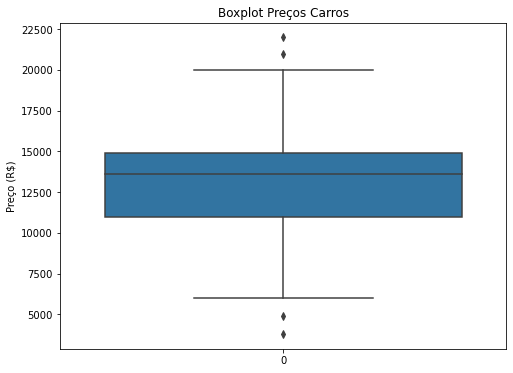

In [25]:
#Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['price'])
plt.ylabel('Preço (R$)')
plt.title('Boxplot Preços Carros')
plt.show()

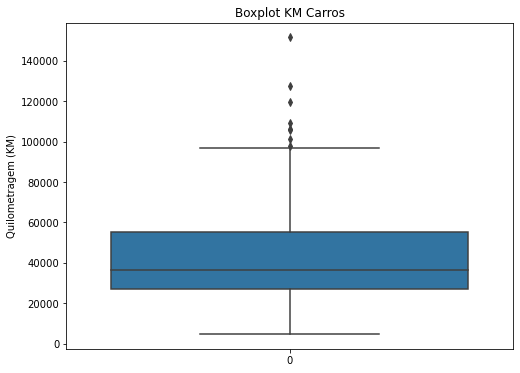

In [26]:
#Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['mileage'])
plt.ylabel('Quilometragem (KM)')
plt.title('Boxplot KM Carros')
plt.show()

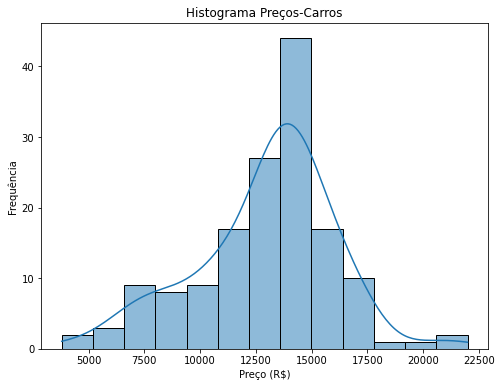

In [27]:
#Histograma
plt.figure(figsize=(8, 6))
sns.histplot(data=df['price'], kde=True)
plt.ylabel('Frequência')
plt.xlabel('Preço (R$)')
plt.title('Histograma Preços-Carros')
plt.show()

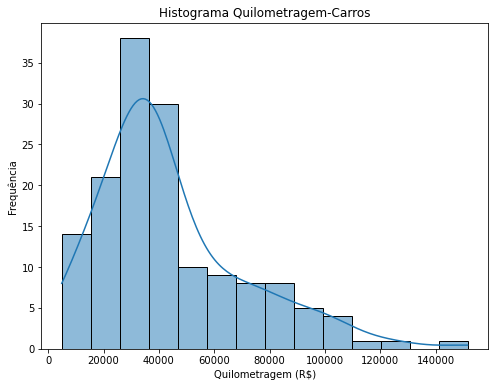

In [28]:
#Histograma
plt.figure(figsize=(8, 6))
sns.histplot(data=df['mileage'], kde=True)
plt.ylabel('Frequência')
plt.xlabel('Quilometragem (R$)')
plt.title('Histograma Quilometragem-Carros')
plt.show()

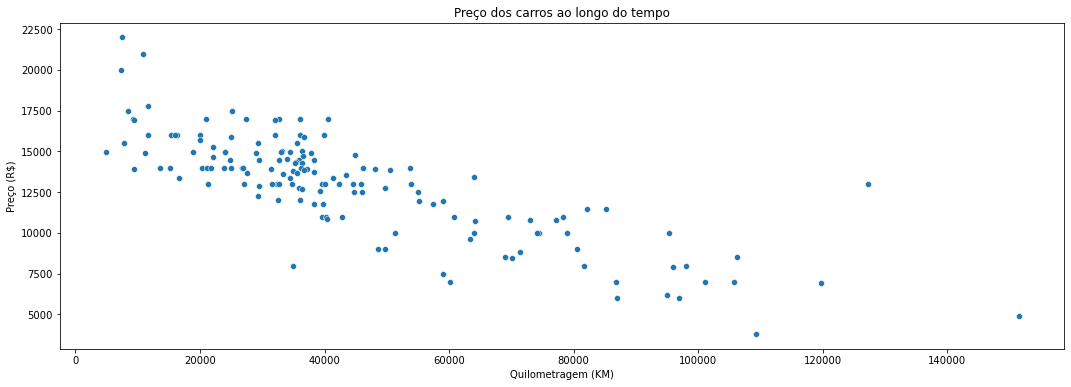

In [32]:
#Scatterplot
plt.figure(figsize=(18, 6))
sns.scatterplot(data=df, x='mileage', y='price')

plt.ylabel('Preço (R$)')
plt.xlabel('Quilometragem (KM)')
plt.title('Preço dos carros ao longo do tempo')
plt.show()

### Variância e desvio padrão

In [37]:
print('Variância [price]: {}'.format(np.var(df['price'])))
print('Variância [mileage]: {}'.format(np.var(df['mileage'])))


print('\nDesvio padrão [price]: {}'.format(np.std(df['price'])))
print('Desvio padrão [mileage]: {}'.format(np.std(df['mileage'])))

Variância [price]: 9684892.902222227
Variância [mileage]: 723180393.9484888

Desvio padrão [price]: 3112.056057050102
Desvio padrão [mileage]: 26892.01357184859


### Frequência dos dados

In [42]:
df['year'].value_counts().sort_index(ascending=False)

2012     1
2011    16
2010    49
2009    42
2008    14
2007    11
2006     6
2005     2
2004     3
2003     1
2002     1
2001     1
2000     3
Name: year, dtype: int64

In [43]:
df['model'].value_counts()

SE     78
SES    49
SEL    23
Name: model, dtype: int64

In [49]:
df['color'].value_counts().sort_index(ascending=True)

Black     35
Blue      17
Gold       1
Gray      16
Green      5
Red       25
Silver    32
White     16
Yellow     3
Name: color, dtype: int64

In [51]:
#Proporções
round(df.groupby(['model'])['model'].count() / len(df) * 100, 2)

model
SE     52.00
SEL    15.33
SES    32.67
Name: model, dtype: float64

In [55]:
df.groupby(['year'])['price'].mean()

year
2000     5586.666667
2001     4899.000000
2002     5995.000000
2003     7900.000000
2004     6976.333333
2005     9241.500000
2006     8330.666667
2007     9747.363636
2008    11156.500000
2009    13145.428571
2010    14545.653061
2011    17098.937500
2012    17500.000000
Name: price, dtype: float64

In [56]:
df.groupby(['year'])['price'].median()

year
2000     5980.0
2001     4899.0
2002     5995.0
2003     7900.0
2004     6980.0
2005     9241.5
2006     8397.5
2007     9999.0
2008    11472.5
2009    13212.0
2010    14495.0
2011    16475.0
2012    17500.0
Name: price, dtype: float64

### Valores missing

In [54]:
df.isnull().sum()

year            0
model           0
price           0
mileage         0
color           0
transmission    0
dtype: int64